In [1]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-19);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

In [2]:
AlT=1e-9;  pH=2:1:12; pe=20.75-pH; T=25; show=0;

In [3]:
% MODEL USING TABLEAU (different gradients or log versus linear variables)
%graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=2; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

TOTALS=[AlT]';
TOTALS(TOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error

for i=1:length(pH)
tic;
[Al(i),AlOH3s(i),Al13(i),AlOH4(i),MASSERR(i)]=Altableau(pH(i),pe(i),TOTALS',flag1,flag2,flag3,flag4,flag5);
tableautime(i)=toc;

Almasserror(i)=100*(MASSERR(1)./AlT);

end

In [4]:
% MODEL USING PHREEQC

minerals=[{'Gibbsite'}]; totalvector=[AlT; 3*AlT]; totalnames=[{'Al'}; {'Cl'}]; 
speciesexport=[{'Al+3'}; {'OH-'};{'AlOH+2'};{'Al(OH)2+'};{'Al2(OH)2+4'};{'Al3(OH)4+5'};{'Al13O4(OH)24+7'}];
acid=['HCl']; 
database=['Al_species.dat']; 


for i=1:length(pH)
tic;
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
runPHREEQCv2noHA(T,pH(i),pe(i),totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime(i)=toc;

Al(i)=solutionspeciesconcs(1); 
OH(i)=solutionspeciesconcs(2); 
AlOH(i)=solutionspeciesconcs(3); 
AlOH2(i)=solutionspeciesconcs(4); 
Al2OH2(i)=solutionspeciesconcs(5); 
Al3OH4(i)=solutionspeciesconcs(6);
Al13(i)=solutionspeciesconcs(7);
AlOH3s(i)=solidconcs(1);

AlmasserrorPHREEQC(i)=100*((AlT-AlOH(i)-AlOH2(i)-2*Al2OH2(i)-3*Al3OH4(i)-13*Al13(i)-AlOH3s(i))./AlT);

end

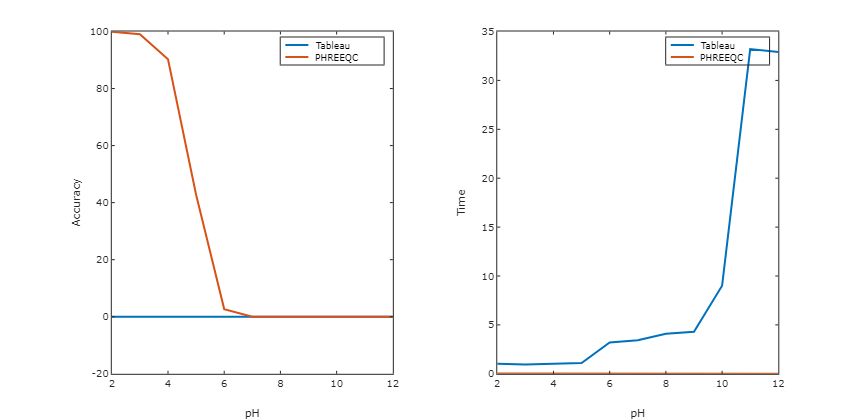

ERROR: received unknown message
Message type: usage_request


In [5]:
subplot(121)
h=plot(pH,Almasserror,pH,AlmasserrorPHREEQC);
legend('Tableau','PHREEQC');
set(h,'linewidth',2)
xlabel('pH');ylabel('Accuracy (% error)')

subplot(122) 
h=plot(pH,tableautime,pH,PHREEQCtime);
legend('Tableau','PHREEQC');
set(h,'linewidth',2)
xlabel('pH');ylabel('Time')
